In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
##without this matplotlib will render somwehere outside jupyter###
%matplotlib inline

In [4]:
full_data = pd.read_csv("./HR_comma_sep.csv")
display(full_data.describe())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
print(full_data.keys())

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [6]:
indices = [5,500,5000]

samples = pd.DataFrame(full_data.loc[indices], columns = full_data.keys())
display(samples)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
5,0.41,0.50,2,153,3,0,1,0,sales,low
500,0.91,0.84,5,265,5,0,1,0,technical,medium
5000,0.35,1.00,6,186,2,0,0,0,technical,low


In [7]:
count_left = np.count_nonzero(full_data.left == 1)
count_promo = np.count_nonzero(full_data.promotion_last_5years == 1)
count_accidents = np.count_nonzero(full_data.Work_accident == 1)
left_percent = float(count_left)/float(full_data.shape[0])*100


print("we observed %s people that left the company" % count_left)
print("This is an equivalent of {:.2f}% of the analyzed workforce".format(left_percent))
print("we observed %s people with promotions" % count_promo)
print("we observed %s people that had accidents" % count_accidents)

we observed 3571 people that left the company
This is an equivalent of 23.81% of the analyzed workforce
we observed 319 people with promotions
we observed 2169 people that had accidents


In [8]:
target = full_data['left']
features = full_data.drop('left', axis = 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]
features[numerical] = scaler.fit_transform(features[numerical])

# Show an example of a record with scaling applied
display(features.head(n = 5))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0,0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0,0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0,0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0,0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0,0,sales,low


In [10]:
featureshot = pd.get_dummies(features)
encoded = list(featureshot.columns)

print(encoded)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 'salary_high', 'salary_low', 'salary_medium']


In [11]:
display(featureshot.head(n = 3))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0.6,0.775701,0.500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


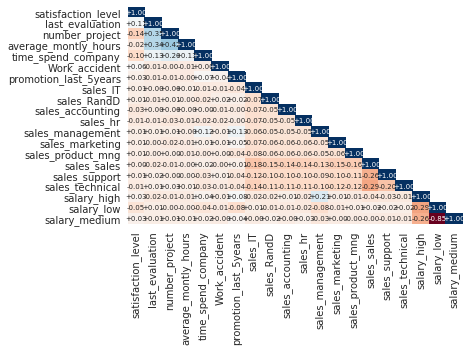

In [12]:
corr = featureshot.corr()
# plot the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 7}, cmap='RdBu', fmt='+.2f', cbar=False)

In [13]:
empleft = full_data[full_data.left == 1]
lefthot = pd.get_dummies(empleft)
empstay = full_data[full_data.left == 0]
stayhot = pd.get_dummies(empstay)

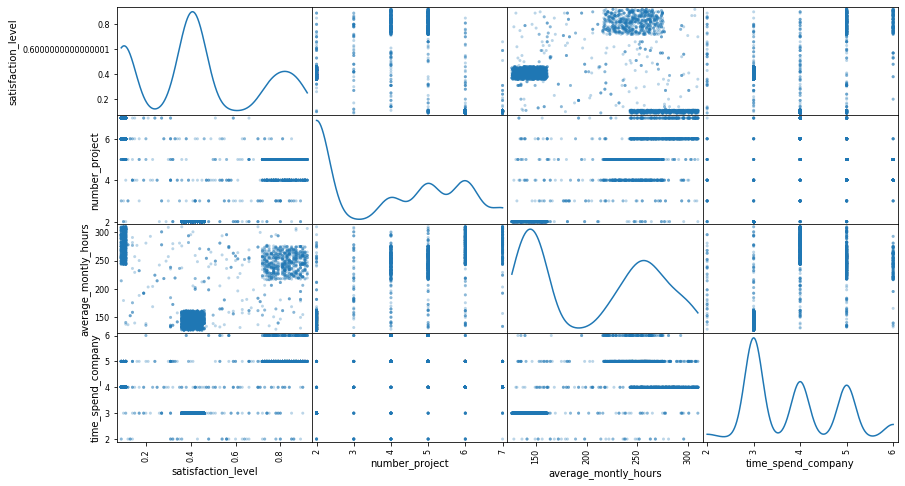

In [24]:
group1 = ["satisfaction_level","number_project","average_montly_hours","time_spend_company"]
scatter_left = lefthot[group1]
from pandas.plotting import scatter_matrix
scatter_matrix(scatter_left, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Text(0.5, 1.0, 'Number of people that left by department')

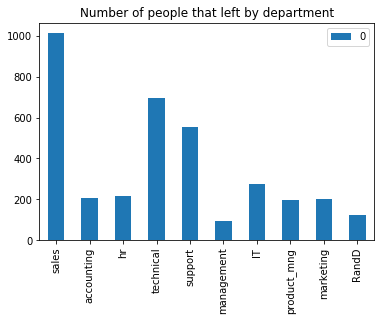

In [15]:
from collections import Counter as ct
data1 = empleft["sales"]
departments_count = ct(data1)
df = pd.DataFrame.from_dict(departments_count, orient='index')
df.plot(kind='bar')
plt.title("Number of people that left by department")

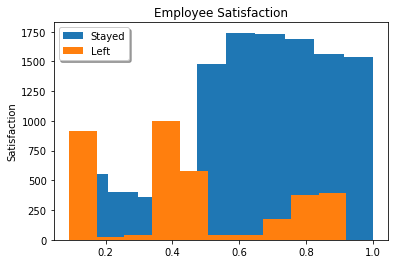

In [16]:
data1 = stayhot["satisfaction_level"]
data2= lefthot["satisfaction_level"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Employee Satisfaction")
plt.ylabel('Samples')
plt.ylabel('Satisfaction')
legend = plt.legend(loc='upper left', shadow=True)

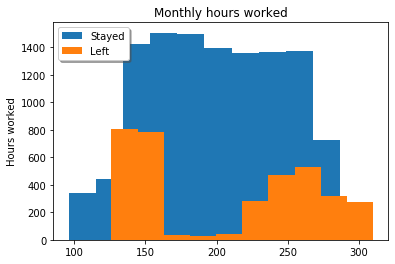

In [17]:
data1 = stayhot["average_montly_hours"]
data2= lefthot["average_montly_hours"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Monthly hours worked")
plt.ylabel('Samples')
plt.ylabel('Hours worked')
legend = plt.legend(loc='upper left', shadow=True)

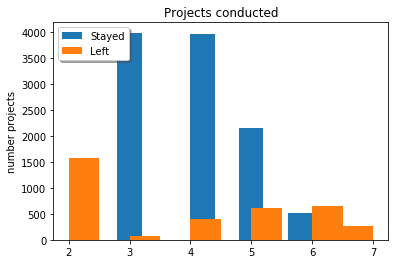

In [18]:
data1 = stayhot["number_project"]
data2= lefthot["number_project"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Projects conducted")
plt.ylabel('Samples')
plt.ylabel('number projects')
legend = plt.legend(loc='upper left', shadow=True)

In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(featureshot, target, test_size = 0.3, random_state = 42)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10499 samples.
Testing set has 4500 samples.


In [29]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

parameters = parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},
{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},
{'min_samples_leaf': (1,2,3,4,5,6,7)},
{'min_weight_fraction_leaf': (0.0,0.1,0.2)}
scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [27]:
print(clf)
from IPython.display import display
#display(pd.DataFrame(grid_obj.grid_scores_))

print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Unoptimized model
------
Accuracy score on testing data: 0.9747
F-score on testing data: 0.9398

Optimized Model
------
Final accuracy score on the testing data: 0.9749
Final F-score on the testing data: 0.9585


In [36]:
from sklearn.ensemble import AdaBoostClassifier


regr2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=100, random_state=42)

regr2.fit(X_train, y_train)

pred_new =(regr2.predict(X_test))
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred_new)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pred_new, beta = 0.5)))

Accuracy score on testing data: 0.9860
F-score on testing data: 0.9788
